In [194]:
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

# file = 'moebius'
file = 'tsukuba'
if file == 'moebius':
    file1 = 'moebius1.png'
    file2 = 'moebius2.png'
else:
    file1 = 'tsukuba1.jpg'
    file2 = 'tsukuba2.jpg'

file_name1 = 'data/{}'.format(file1)
file_name2 = 'data/{}'.format(file2)
input_left = cv2.imread(file_name1, 0)
input_right = cv2.imread(file_name2, 0)

imgHeight, imgWidth = input_left.shape
print(input_left.shape)
print(input_right.shape)

(288, 384)
(288, 384)


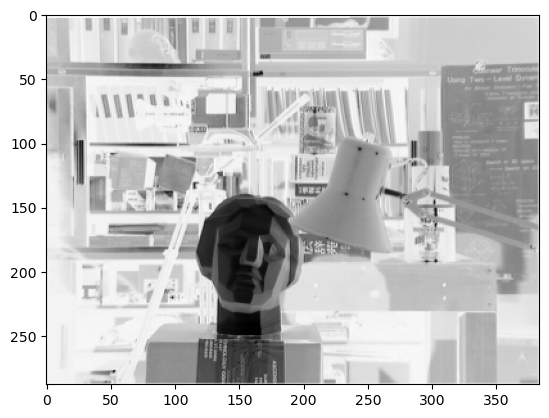

In [195]:
plt.imshow(input_left, cmap='gray_r')

In [196]:
DbasicSubpixel = np.zeros(input_left.shape)

disparityRange = 1
halfBlockSize = 2
blockSize = 2 * halfBlockSize + 1
method = 'sad'

图像行：0 / 288 (0.0)

图像行：10 / 288 (3.4722222222222223)

图像行：20 / 288 (6.944444444444445)

图像行：30 / 288 (10.416666666666668)

图像行：40 / 288 (13.88888888888889)

图像行：50 / 288 (17.36111111111111)

图像行：60 / 288 (20.833333333333336)

图像行：70 / 288 (24.305555555555554)

图像行：80 / 288 (27.77777777777778)

图像行：90 / 288 (31.25)

图像行：100 / 288 (34.72222222222222)

图像行：110 / 288 (38.19444444444444)

图像行：120 / 288 (41.66666666666667)

图像行：130 / 288 (45.13888888888889)

图像行：140 / 288 (48.61111111111111)

图像行：150 / 288 (52.083333333333336)

图像行：160 / 288 (55.55555555555556)

图像行：170 / 288 (59.02777777777778)

图像行：180 / 288 (62.5)

图像行：190 / 288 (65.97222222222221)

图像行：200 / 288 (69.44444444444444)

图像行：210 / 288 (72.91666666666666)

图像行：220 / 288 (76.38888888888889)

图像行：230 / 288 (79.86111111111111)

图像行：240 / 288 (83.33333333333334)

图像行：250 / 288 (86.80555555555556)

图像行：260 / 288 (90.27777777777779)

图像行：270 / 288 (93.75)

图像行：280 / 288 (97.22222222222221)



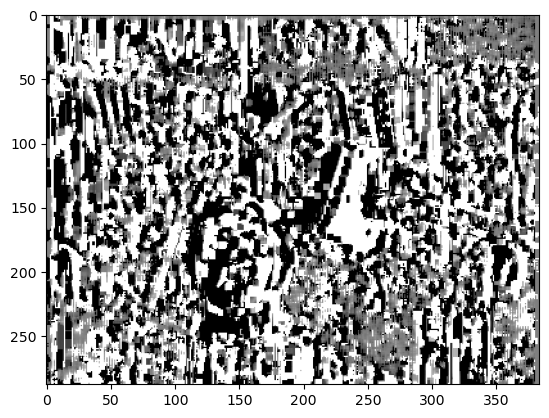

In [197]:
for m in range(imgHeight):
    minr = max(0, m - halfBlockSize)
    maxr = min(imgHeight - 1, m + halfBlockSize)
    for n in range(imgWidth):
        minc = max(0, n - halfBlockSize)
        maxc = min(imgWidth - 1, n + halfBlockSize)

        mind = max(-disparityRange, -minc)
        # mind = 0
        maxd = min(disparityRange, imgWidth - 1 - maxc)

        template = input_left[minr:maxr + 1, minc:maxc + 1]
        numBlocks = maxd - mind + 1
        blockDiffs = np.zeros(numBlocks)

        ncc = 0
        nccNumerator = 0
        nccDenominator = 0
        nccDenominatorRightWindow = 0
        nccDenominatorLeftWindow = 0

        for i in range(mind, maxd + 1):
            block = input_right[minr:maxr + 1, minc + i:maxc + i + 1]
            blockIndex = i - mind
            for j in range(minr, maxr + 1):
                for k in range(minc, maxc + 1):
                    # SAD
                    if method == 'sad':
                        blockDiff = np.abs(input_right[j, k] - input_left[j, k + i])
                        blockDiffs[blockIndex] = blockDiffs[blockIndex] + blockDiff
                    elif method == 'ssd':
                        blockDiff = np.sqrt(np.abs(input_right[j, k] - input_left[j, k + i]))
                        blockDiffs[blockIndex] = blockDiffs[blockIndex] + blockDiff
                    else:
                        nccNumerator = nccNumerator + (input_right[j, k] * input_left[j, k + i])
                        nccDenominatorLeftWindow = nccDenominatorLeftWindow + (
                                    input_left[j, k + i] * input_left[j, k + i])
                        nccDenominatorRightWindow = nccDenominatorRightWindow + (input_right[j, k] * input_right[j, k])

            # nccDenominator = np.sqrt(nccDenominatorRightWindow * nccDenominatorLeftWindow)
            # ncc = nccNumerator / nccDenominator
            # blockDiffs[blockIndex, 1] = ncc
        if method == 'ncc':
            bestMatchIndex = np.argmax(np.array(blockDiffs))
        else:
            bestMatchIndex = np.argmin(np.array(blockDiffs))
        d = bestMatchIndex + mind

        if (bestMatchIndex == 0) or (bestMatchIndex == numBlocks - 1):
            DbasicSubpixel[m, n] = d
        else:
            C1 = blockDiffs[bestMatchIndex - 1]
            C2 = blockDiffs[bestMatchIndex]
            C3 = blockDiffs[bestMatchIndex + 1]
            DbasicSubpixel[m, n] = d - (0.5 * (C3 - C1) / (C1 - (2 * C2) + C3))

    if np.mod(m, 10) == 0:
        print('图像行：{} / {} ({})\n'.format(m, imgHeight, (m / imgHeight) * 100))

plt.imshow(DbasicSubpixel, cmap='gray_r')

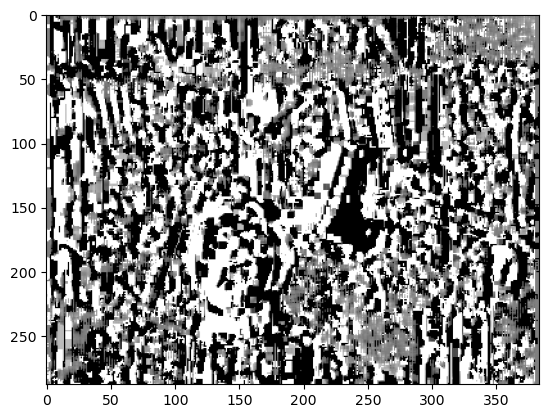

In [198]:
plt.imshow(DbasicSubpixel, cmap='gray')

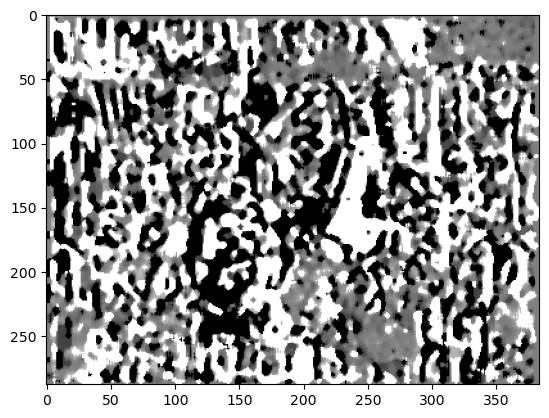

In [199]:
import scipy.signal as signal

DbasicSubpixel_2 = signal.medfilt2d(DbasicSubpixel, (5, 5))
plt.imshow(DbasicSubpixel_2, cmap='gray_r')

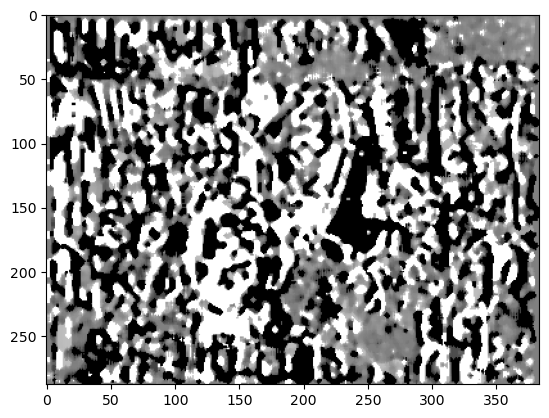

In [200]:
plt.imshow(DbasicSubpixel_2, cmap='gray')